In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [2]:
duration = pd.read_csv('duration.csv', delimiter=";")
duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"5100,000000"
1,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"12240,000000"
2,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"4080,000000"
3,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"9120,000000"
4,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"30600,000000"


In [3]:
duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12687 entries, 0 to 12686
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                12687 non-null  int64  
 1   productcategory_id        12687 non-null  object 
 2   material_id               12687 non-null  object 
 3   outer_diameter            12687 non-null  object 
 4   inner_diameter            12687 non-null  int64  
 5   height                    12687 non-null  int64  
 6   weight                    12687 non-null  object 
 7   heattreatmentcategory_id  12687 non-null  int64  
 8   workplace_id              7348 non-null   float64
 9   duration_seconds          12687 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 991.3+ KB


In [4]:
# Remove commas or any non-numeric characters and convert to float
duration['outer_diameter'] = duration['outer_diameter'].str.replace(',', '').astype(float)
duration['weight'] = duration['weight'].str.replace(',', '').astype(float)
duration['duration_seconds'] = duration['duration_seconds'].str.replace(',', '').astype(float)
duration['material_id'] = pd.to_numeric(duration['material_id'], errors='coerce')

duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12687 entries, 0 to 12686
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                12687 non-null  int64  
 1   productcategory_id        12687 non-null  object 
 2   material_id               11847 non-null  float64
 3   outer_diameter            12687 non-null  float64
 4   inner_diameter            12687 non-null  int64  
 5   height                    12687 non-null  int64  
 6   weight                    12687 non-null  float64
 7   heattreatmentcategory_id  12687 non-null  int64  
 8   workplace_id              7348 non-null   float64
 9   duration_seconds          12687 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 991.3+ KB


In [5]:
duration.describe()

,product_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
count,12687.000000,11847.000000,12687.000000,12687.000000,12687.000000,1.268700e+04,12687.000000,7348.000000,1.268700e+04
mean,3810.700796,1.462424,875.034760,454.651533,132.319146,3.513939e+14,1.494837,50764.726592,3.546999e+09
std,2047.595577,0.349043,4080.872342,334.329717,115.252568,2.586086e+14,1.674465,1575.460696,6.128239e+09
min,25.000000,1.003700,80.000000,10.000000,10.000000,-2.444892e+14,0.000000,50501.000000,0.000000e+00
25%,2029.500000,1.402100,360.000000,229.000000,52.000000,1.384454e+14,0.000000,50501.000000,3.600000e+08
50%,3871.000000,1.430100,514.000000,360.000000,94.000000,2.841005e+14,1.000000,50510.000000,1.140000e+09
75%,5629.000000,1.457100,736.000000,570.000000,180.000000,5.201703e+14,4.000000,50513.000000,4.020000e+09
max,7372.000000,3.723500,95818.000000,3147.000000,1550.000000,9.988278e+14,6.000000,70003.000000,8.628000e+10


In [6]:
duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,5.100000e+09
1,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,1.224000e+10
2,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,4.080000e+09
3,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,9.120000e+09
4,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,3.060000e+10


In [7]:
stainless_steel_energy = pd.read_csv('stainless_steel_energy.csv',  delimiter=";")
stainless_steel_energy.head()

,productcategory_id,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
0,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:25:00,58
1,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:26:00,58
2,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:27:00,58
3,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:28:00,58
4,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:29:00,58


In [8]:
stainless_steel_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   productcategory_id          40582 non-null  object 
 1   material_id                 40582 non-null  object 
 2   outer_diameter              40582 non-null  object 
 3   height                      40582 non-null  int64  
 4   weight                      40582 non-null  object 
 5   heattreatmentcategory_id    40582 non-null  int64  
 6   heattreatment_temperatures  0 non-null      float64
 7   forming_temperatures        0 non-null      float64
 8   dimension                   0 non-null      float64
 9   input_weight                40582 non-null  int64  
 10  workplace_id                40582 non-null  int64  
 11  product_id                  40582 non-null  int64  
 12  mes_datetime                40582 non-null  object 
 13  value                       405

In [9]:
stainless_steel_energy['mes_datetime'] = pd.to_datetime(stainless_steel_energy['mes_datetime'], errors='coerce')
stainless_steel_energy['outer_diameter'] = stainless_steel_energy['outer_diameter'].str.replace(',', '').astype(float)
stainless_steel_energy['weight'] = duration['weight'].replace(',', '').astype(float)
stainless_steel_energy['material_id'] = pd.to_numeric(duration['material_id'], errors='coerce')

In [11]:
stainless_steel_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   productcategory_id          40582 non-null  object        
 1   material_id                 11847 non-null  float64       
 2   outer_diameter              40582 non-null  float64       
 3   height                      40582 non-null  int64         
 4   weight                      12687 non-null  float64       
 5   heattreatmentcategory_id    40582 non-null  int64         
 6   heattreatment_temperatures  0 non-null      float64       
 7   forming_temperatures        0 non-null      float64       
 8   dimension                   0 non-null      float64       
 9   input_weight                40582 non-null  int64         
 10  workplace_id                40582 non-null  int64         
 11  product_id                  40582 non-null  int64     

In [12]:

stainless_steel_energy.describe()

,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
count,11847.000000,40582.000000,40582.000000,1.268700e+04,40582.000000,0.0,0.0,0.0,40582.0,40582.000000,40582.000000,40582,40582.000000
mean,1.462424,1073.778128,132.631783,3.513939e+14,1.326894,NaN,NaN,NaN,0.0,50513.277882,3814.841063,2012-06-27 10:43:21.785298944,81.314400
min,1.003700,122.000000,10.000000,-2.444892e+14,0.000000,NaN,NaN,NaN,0.0,50512.000000,25.000000,2012-01-19 14:00:00,0.000000
25%,1.402100,400.000000,50.000000,1.384454e+14,0.000000,NaN,NaN,NaN,0.0,50513.000000,2209.000000,2012-04-18 07:20:00,55.000000
50%,1.430100,559.000000,90.000000,2.841005e+14,1.000000,NaN,NaN,NaN,0.0,50513.000000,3864.500000,2012-07-02 16:35:30,72.000000
75%,1.457100,800.000000,173.000000,5.201703e+14,2.000000,NaN,NaN,NaN,0.0,50513.000000,5577.000000,2012-09-07 16:31:45,87.000000
max,3.723500,95818.000000,1550.000000,9.988278e+14,6.000000,NaN,NaN,NaN,0.0,50516.000000,7356.000000,2012-11-15 06:41:00,421.000000
std,0.349043,5330.570185,138.827791,2.586086e+14,1.605781,NaN,NaN,NaN,0.0,0.678670,2007.319572,NaN,56.750031


In [13]:
duration.shape, stainless_steel_energy.shape

((12687, 10), (40582, 14))

In [14]:
stainless_steel_energy.isnull().sum()

productcategory_id                0
material_id                   28735
outer_diameter                    0
height                            0
weight                        27895
heattreatmentcategory_id          0
heattreatment_temperatures    40582
forming_temperatures          40582
dimension                     40582
input_weight                      0
workplace_id                      0
product_id                        0
mes_datetime                      0
value                             0
dtype: int64

In [15]:
duration.isnull().sum()

product_id                     0
productcategory_id             0
material_id                  840
outer_diameter                 0
inner_diameter                 0
height                         0
weight                         0
heattreatmentcategory_id       0
workplace_id                5339
duration_seconds               0
dtype: int64

<Axes: >

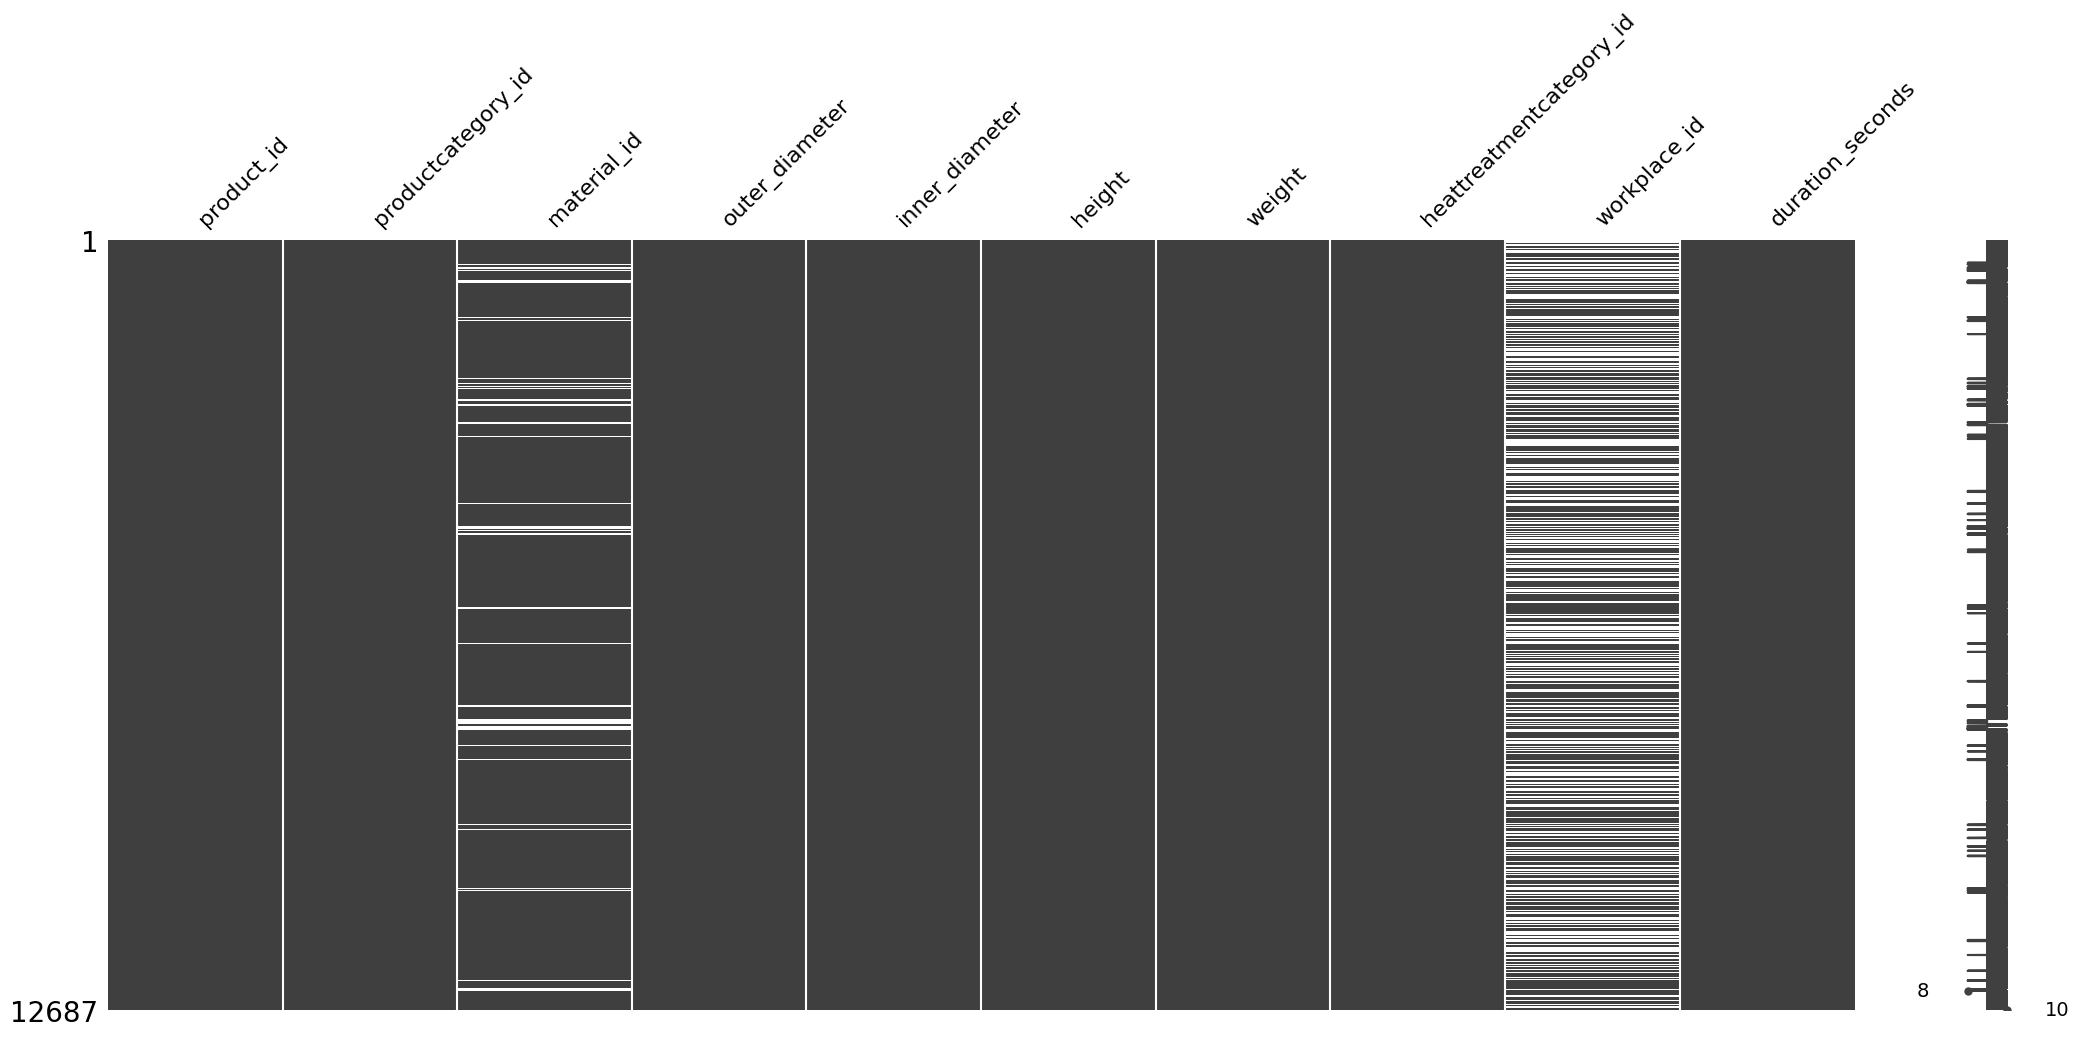

In [16]:
msno.matrix(duration)

<Axes: >

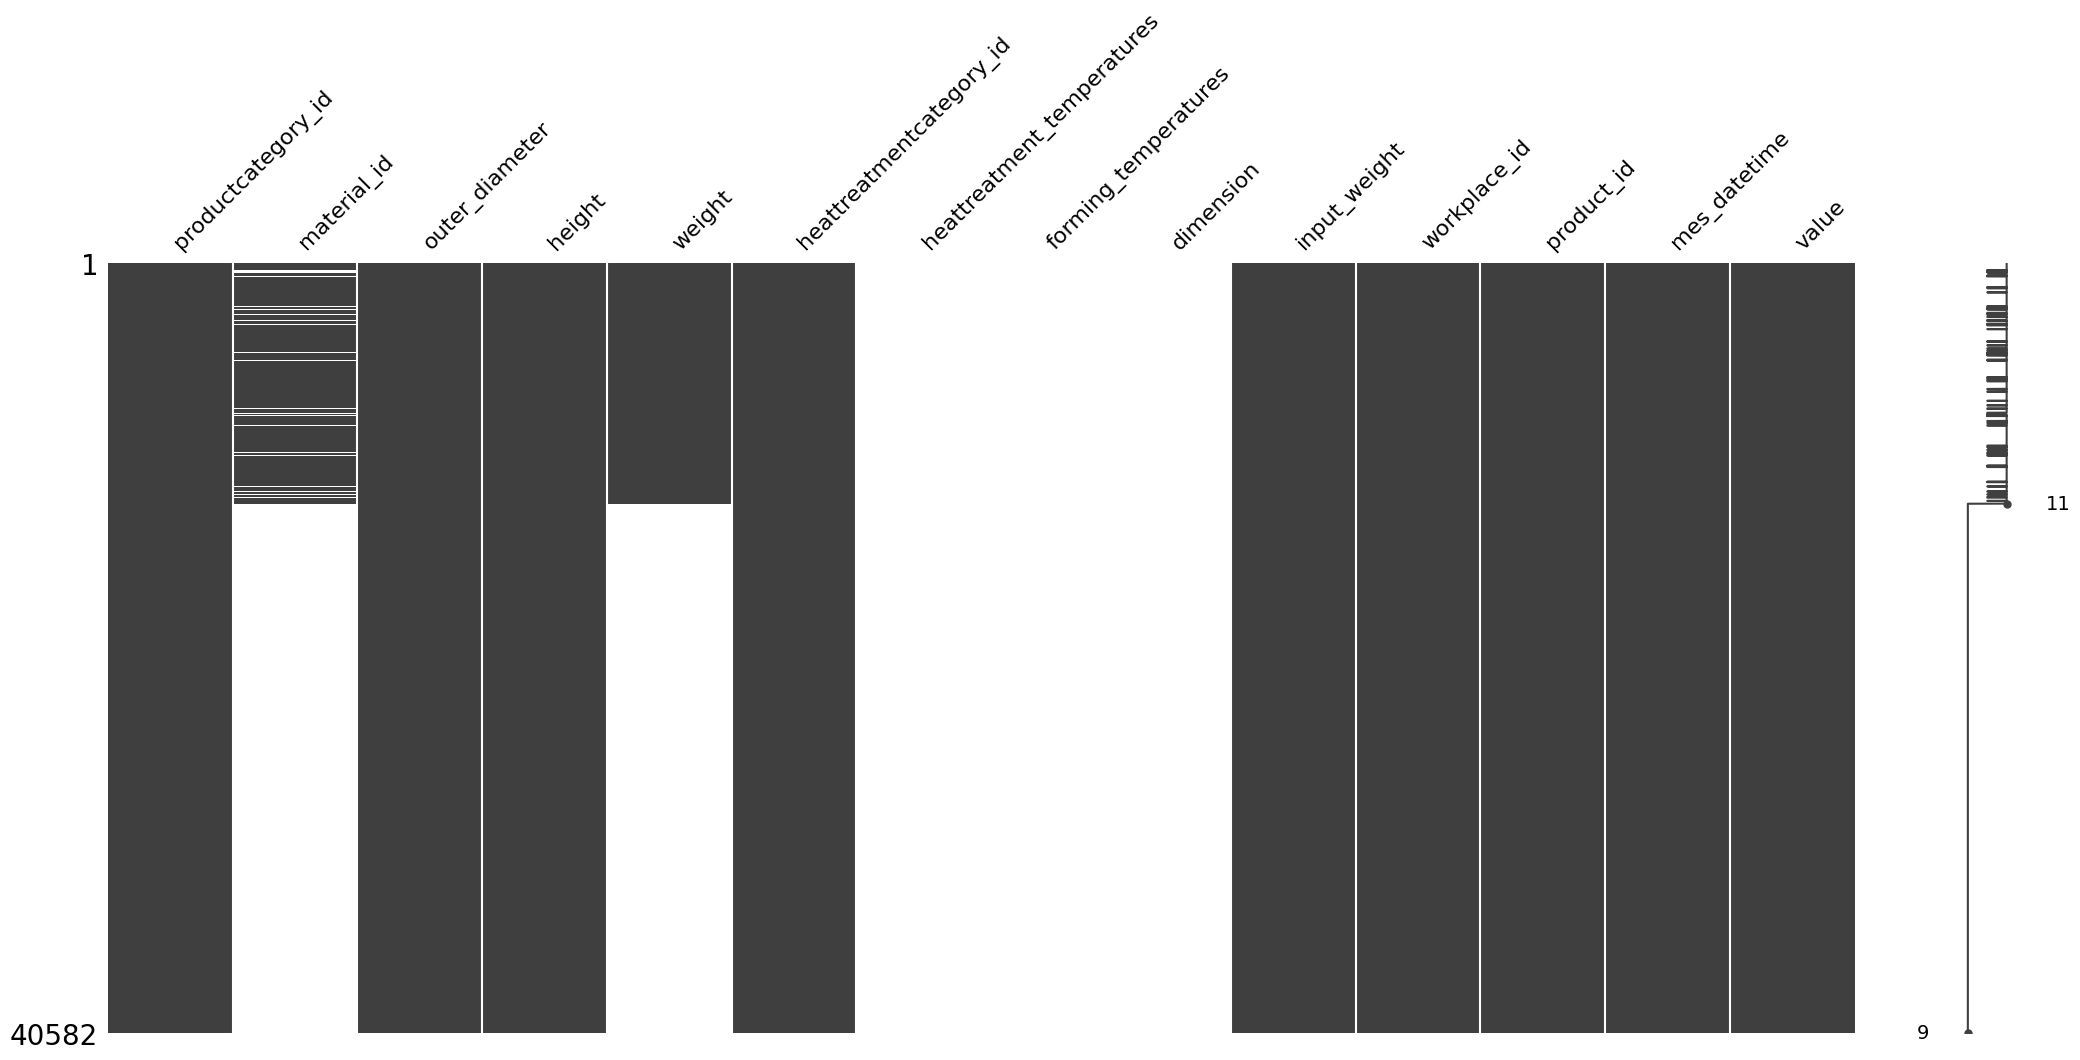

In [17]:
msno.matrix(stainless_steel_energy)

In [18]:
#dropping null values
# Drop rows with missing values in any column
duration = duration.dropna()
duration.isnull().sum()


product_id                  0
productcategory_id          0
material_id                 0
outer_diameter              0
inner_diameter              0
height                      0
weight                      0
heattreatmentcategory_id    0
workplace_id                0
duration_seconds            0
dtype: int64

In [19]:
stainless_steel_energy = stainless_steel_energy.drop(columns=['heattreatment_temperatures','forming_temperatures','dimension','input_weight'])
stainless_steel_energy.isnull().sum()

productcategory_id              0
material_id                 28735
outer_diameter                  0
height                          0
weight                      27895
heattreatmentcategory_id        0
workplace_id                    0
product_id                      0
mes_datetime                    0
value                           0
dtype: int64

In [20]:
stainless_steel_energy = stainless_steel_energy.dropna(subset=['material_id', 'weight'])
stainless_steel_energy.isnull().sum()

productcategory_id          0
material_id                 0
outer_diameter              0
height                      0
weight                      0
heattreatmentcategory_id    0
workplace_id                0
product_id                  0
mes_datetime                0
value                       0
dtype: int64

In [25]:
stainless_steel_energy.shape

(11847, 10)

In [26]:
duration.shape

(6840, 10)

In [71]:
duration.duplicated().sum()

np.int64(120)

In [73]:
duration = duration.drop_duplicates()

In [74]:
duration.duplicated().sum()

np.int64(0)

In [75]:
stainless_steel_energy.duplicated().sum()

np.int64(47)

In [76]:
stainless_steel_energy = stainless_steel_energy.drop_duplicates()

In [77]:
stainless_steel_energy.duplicated().sum()

np.int64(0)

In [78]:
duration.dtypes

product_id                    int64
productcategory_id           object
material_id                 float64
outer_diameter              float64
inner_diameter                int64
height                        int64
weight                      float64
heattreatmentcategory_id      int64
workplace_id                float64
duration_seconds            float64
dtype: object

In [79]:
stainless_steel_energy.dtypes

productcategory_id                  object
material_id                        float64
outer_diameter                     float64
height                               int64
weight                             float64
heattreatmentcategory_id             int64
workplace_id                         int64
product_id                           int64
mes_datetime                datetime64[ns]
value                                int64
dtype: object

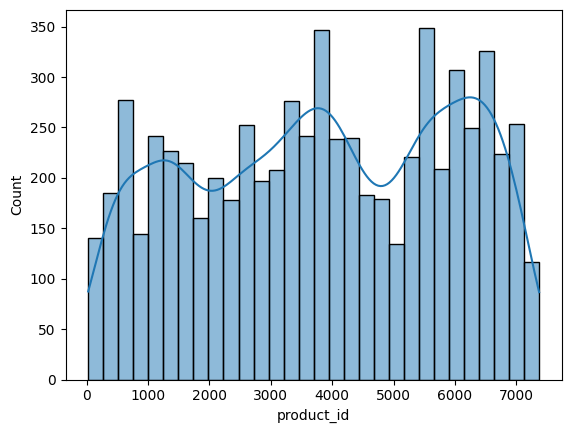

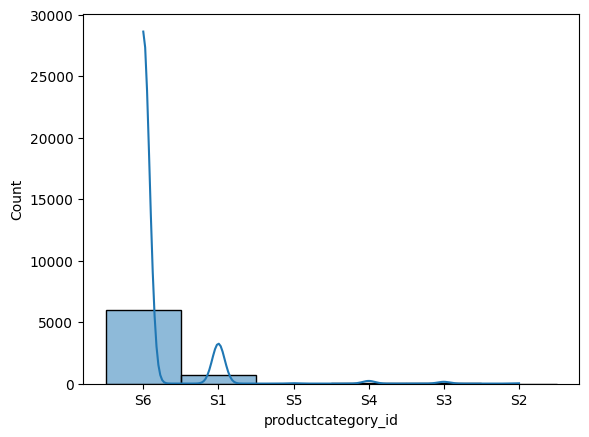

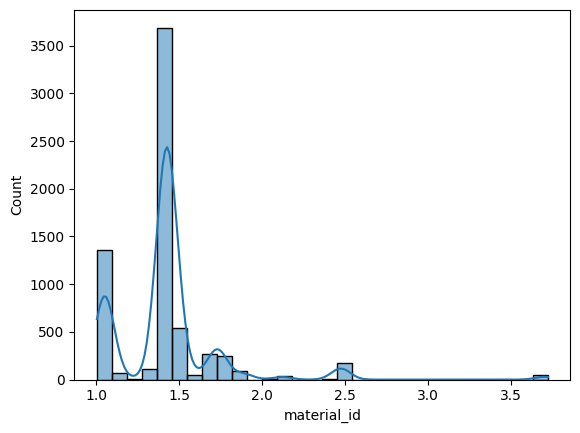

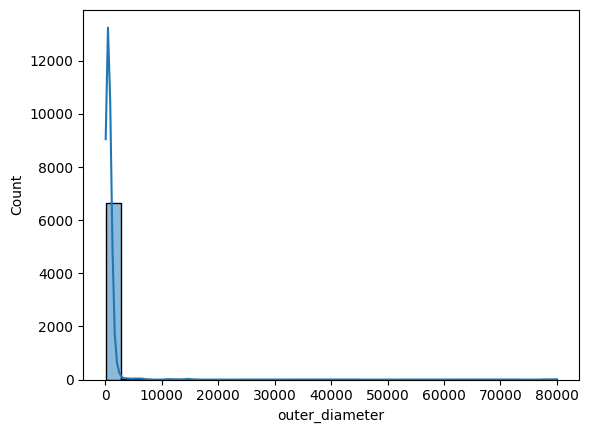

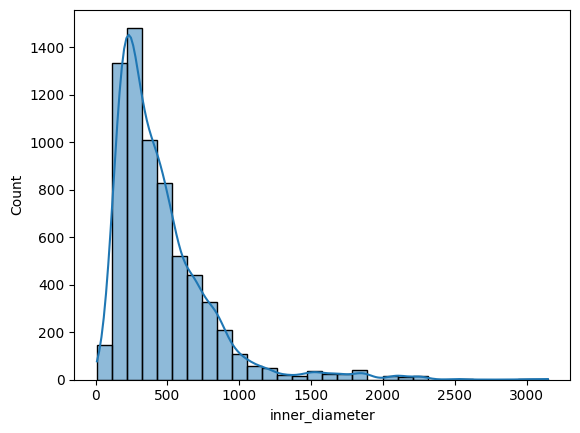

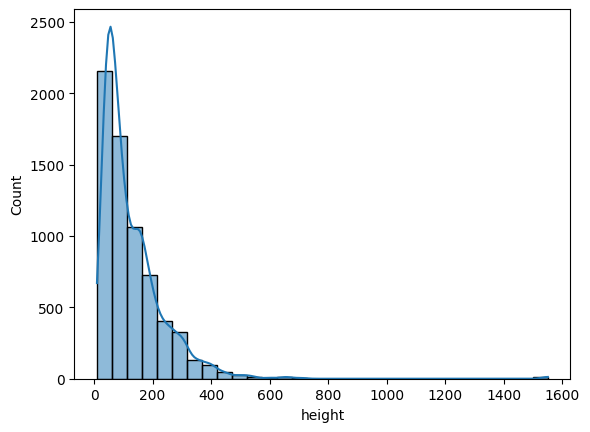

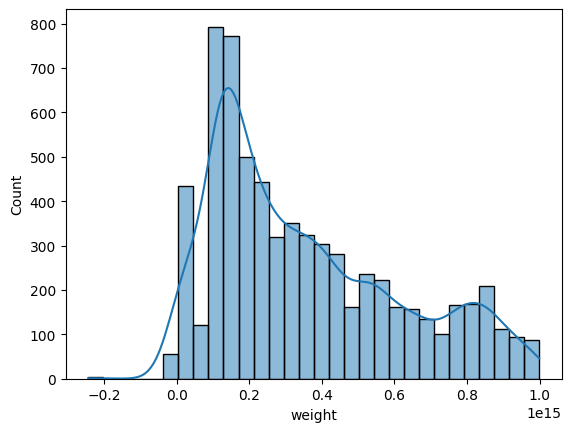

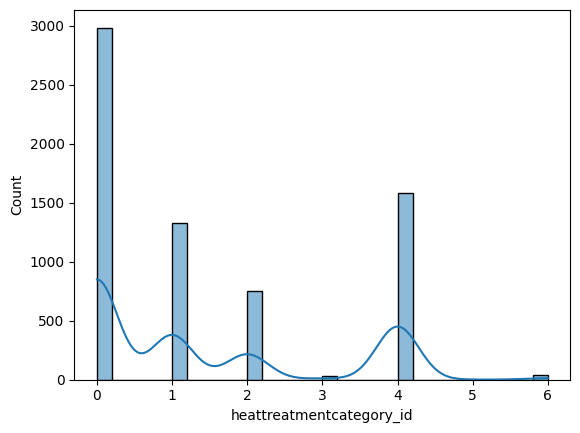

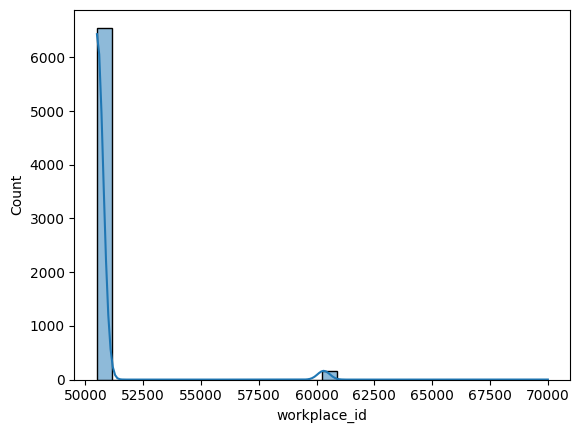

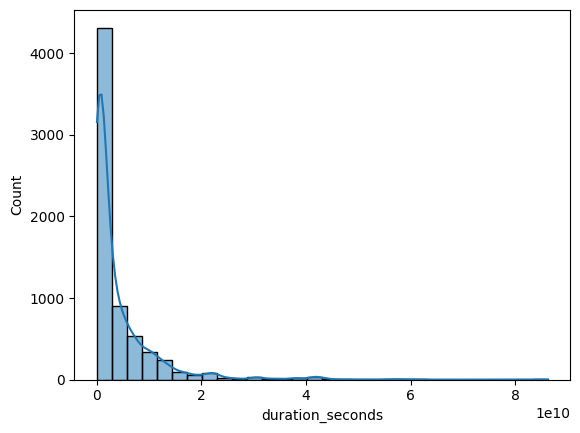

In [80]:
for col in duration.columns:
    sns.histplot(duration[col], bins=30, kde=True)
    plt.show()

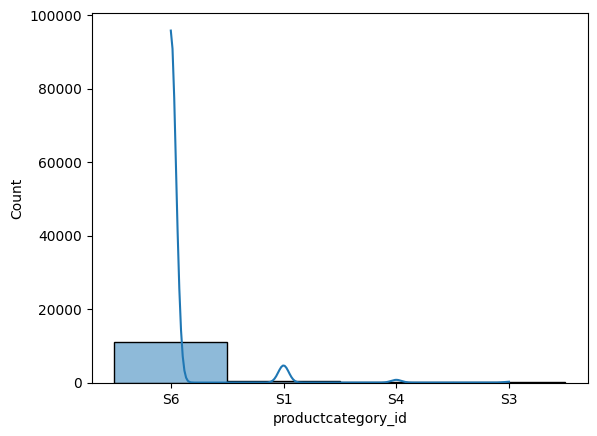

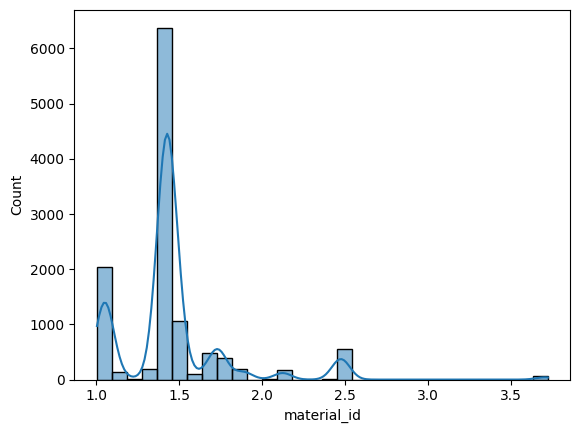

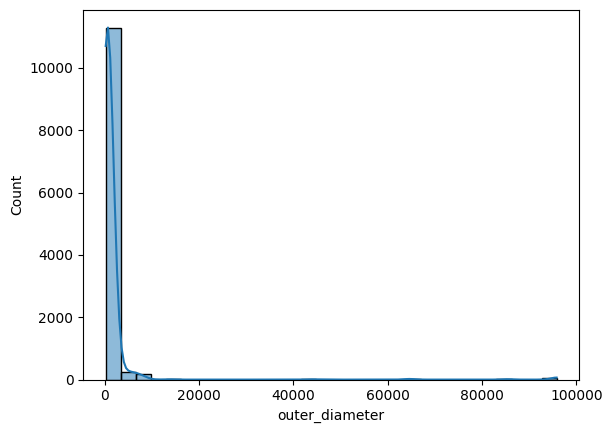

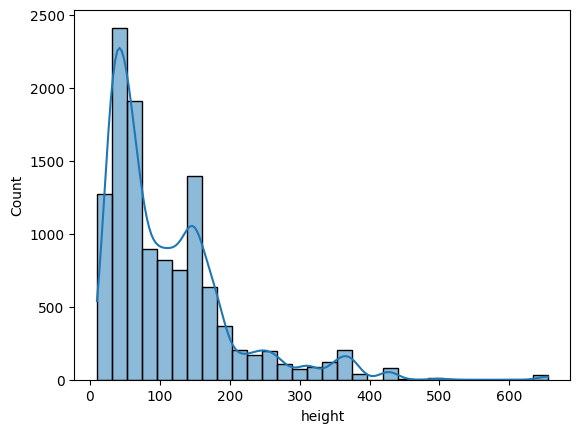

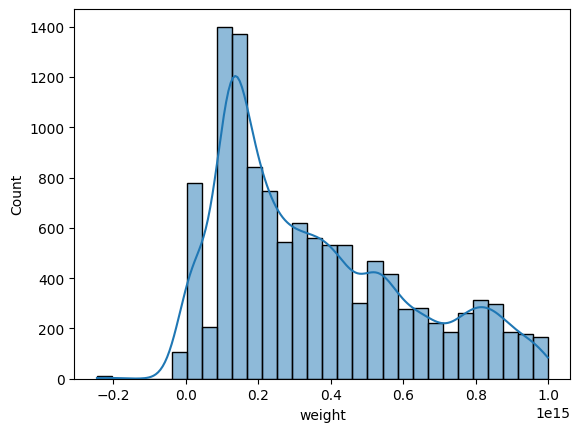

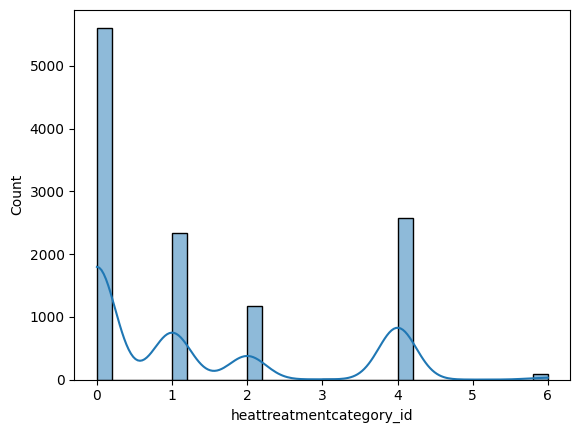

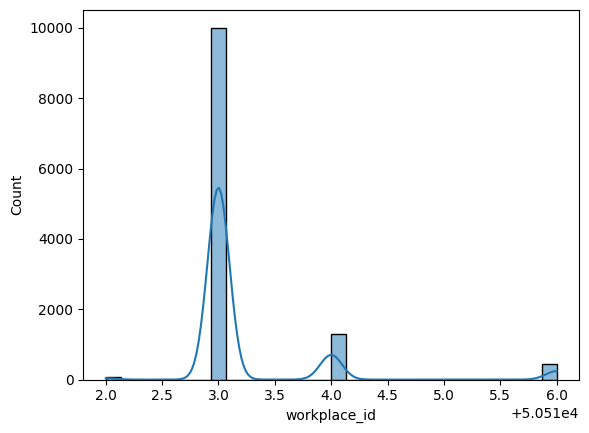

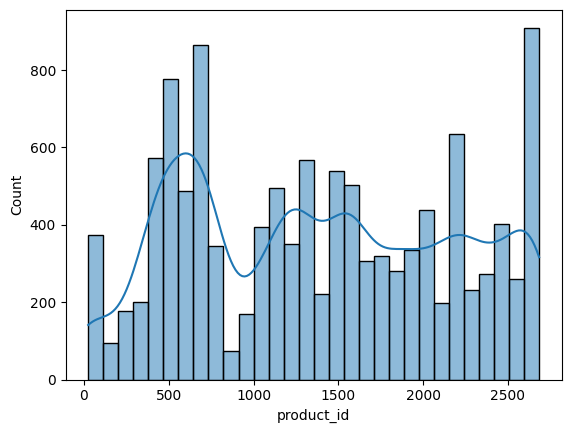

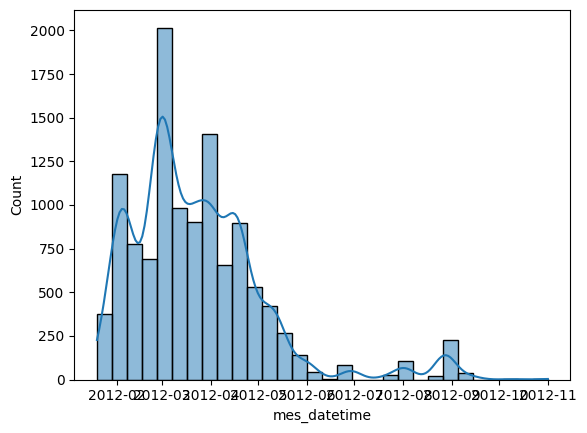

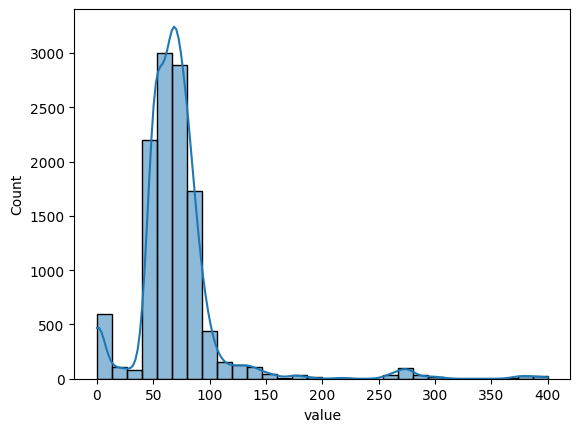

In [81]:
for col in stainless_steel_energy.columns:
    sns.histplot(stainless_steel_energy[col], bins=30, kde=True)
    plt.show()

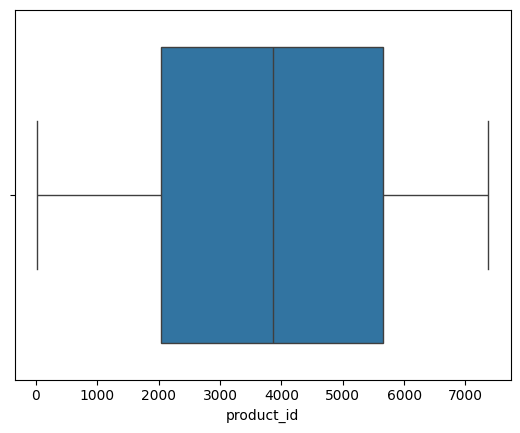

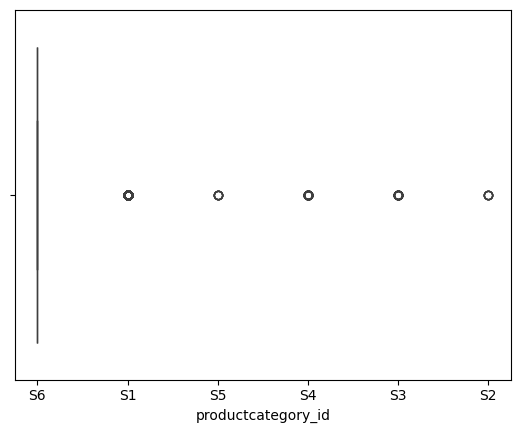

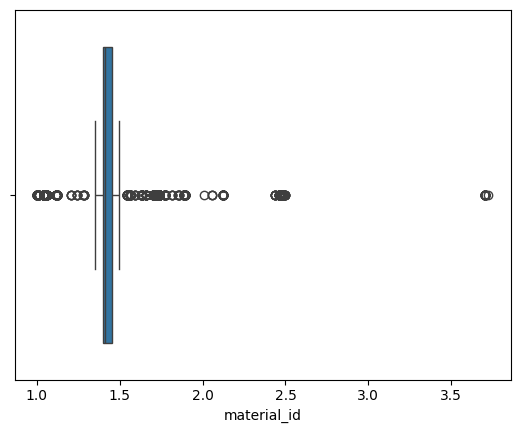

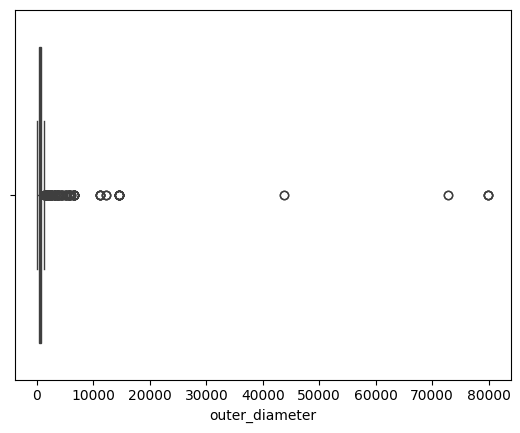

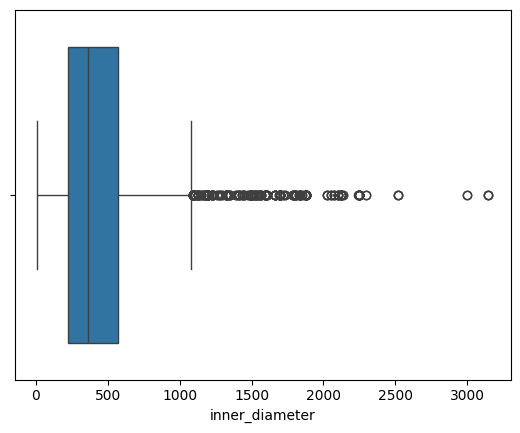

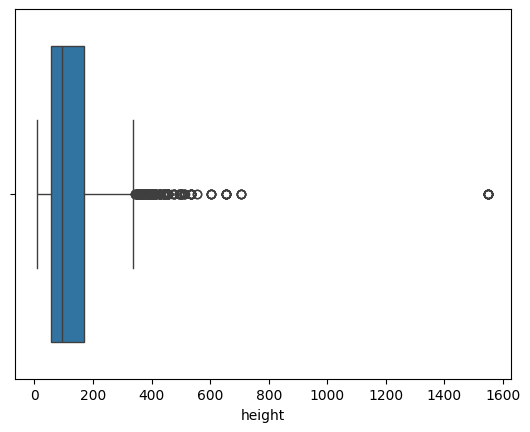

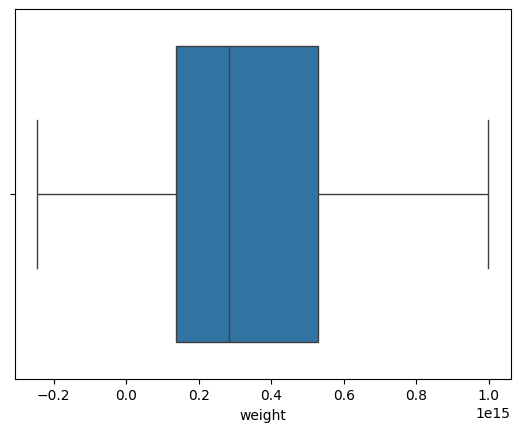

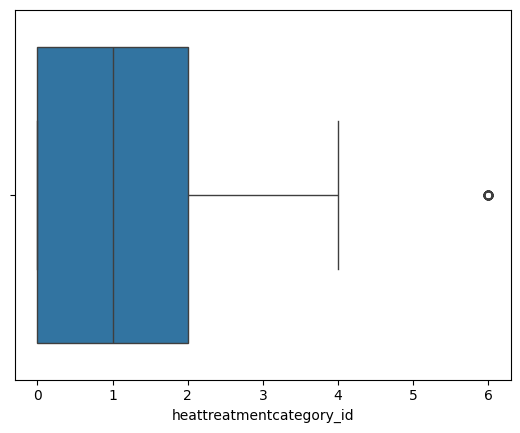

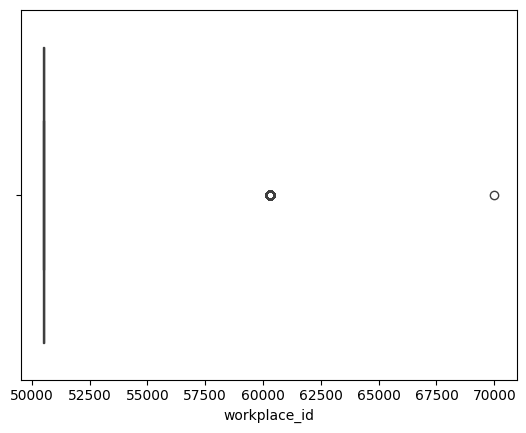

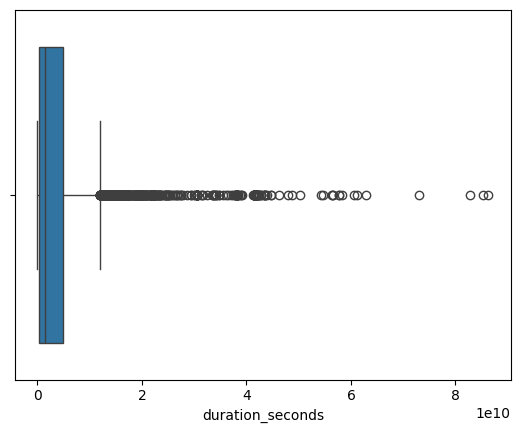

In [82]:
for col in duration.columns:
    sns.boxplot(x=duration[col])
    plt.show()

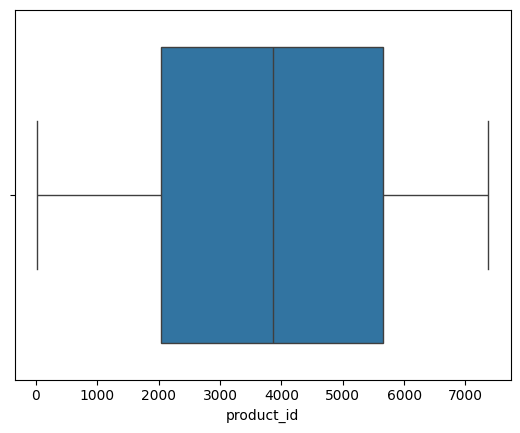

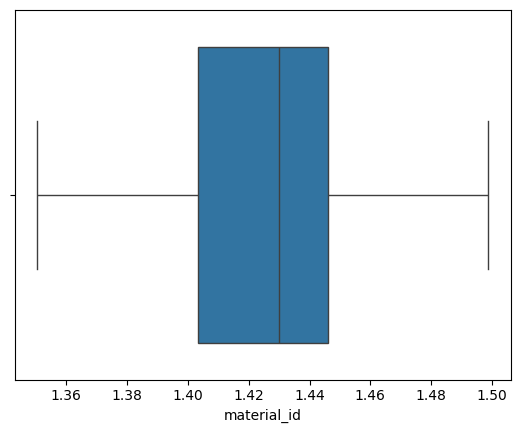

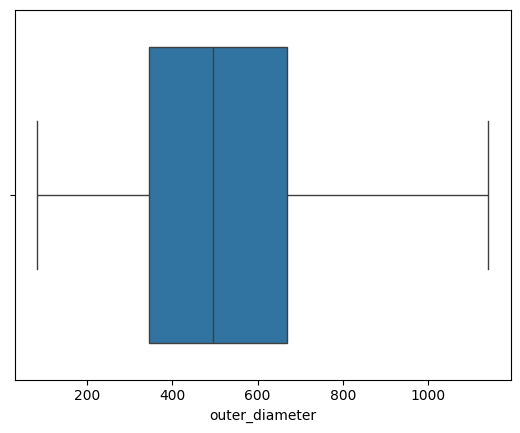

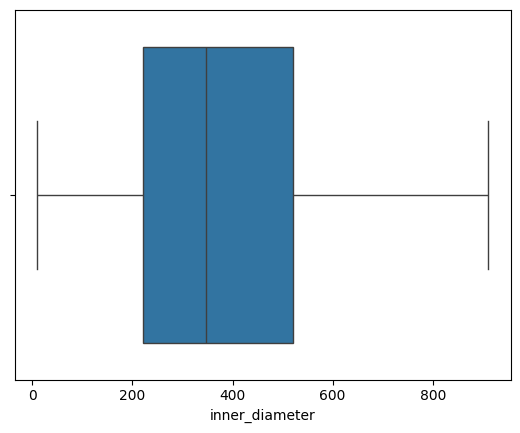

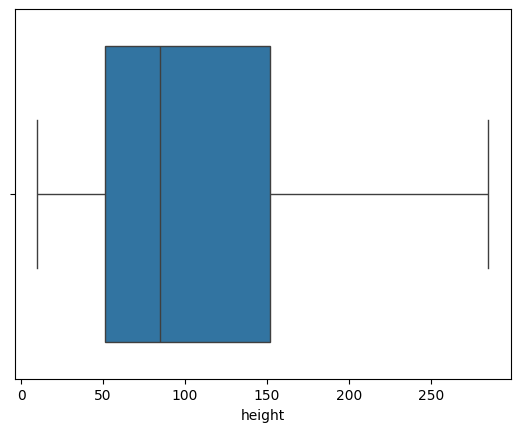

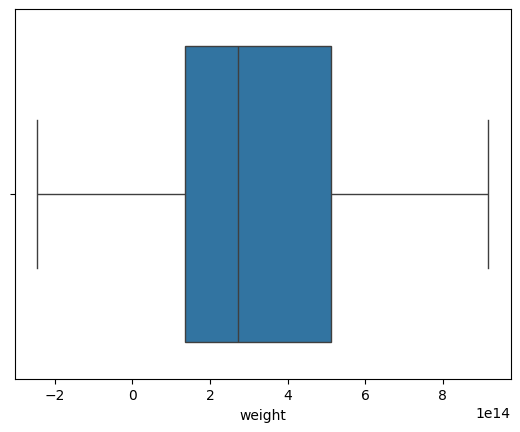

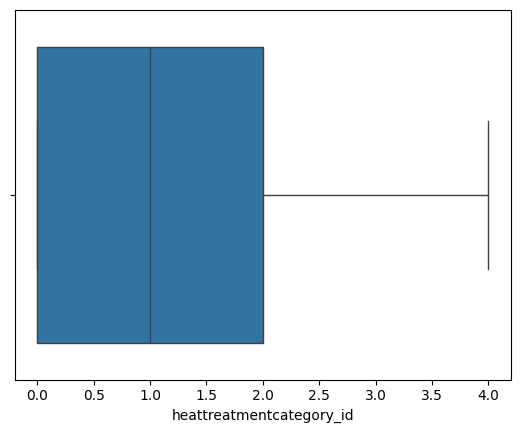

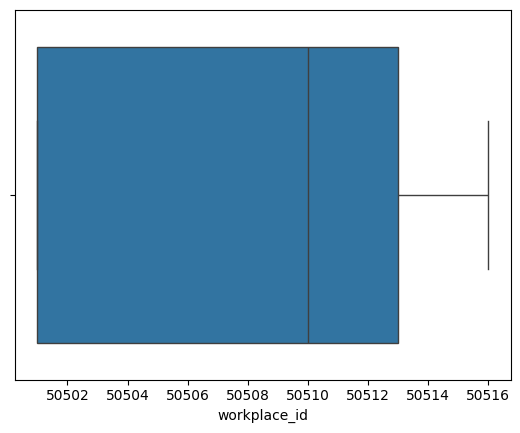

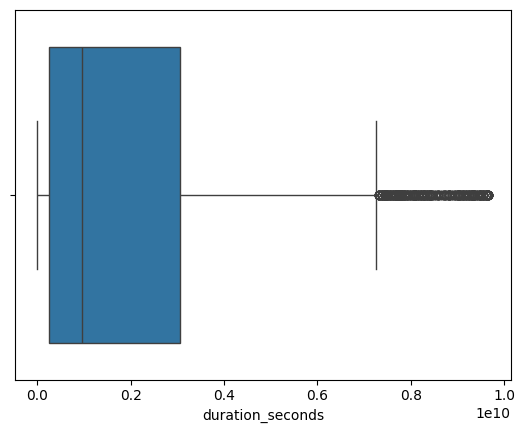

In [87]:
#removing outliers
# Remove rows with outliers basesed on IQR
for col in duration.columns:
    #since id is an object and the same value
    if col != 'productcategory_id':
        Q1 = duration[col].quantile(0.25)
        Q3 = duration[col].quantile(0.75)
        # Calculate IQR
        IQR = Q3 - Q1
        # Define bounds
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR
        cleaned_duration= duration[(duration[col] >= lower_bound) & (duration[col] <= upper_bound)]
        #checking removed outliers
        sns.boxplot(x=cleaned_duration[col])
        plt.show()


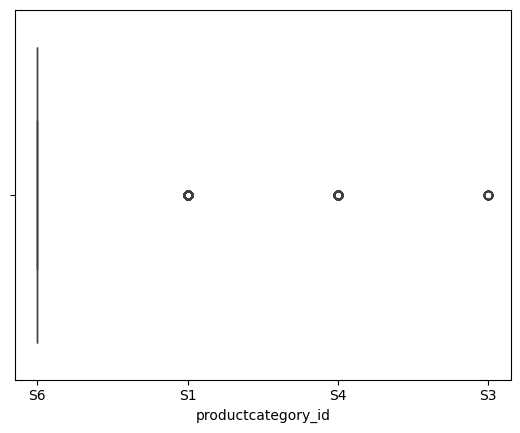

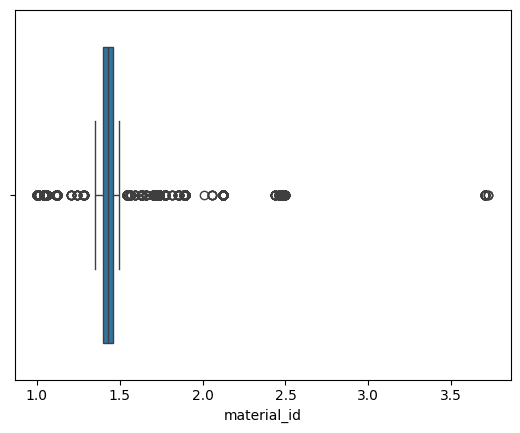

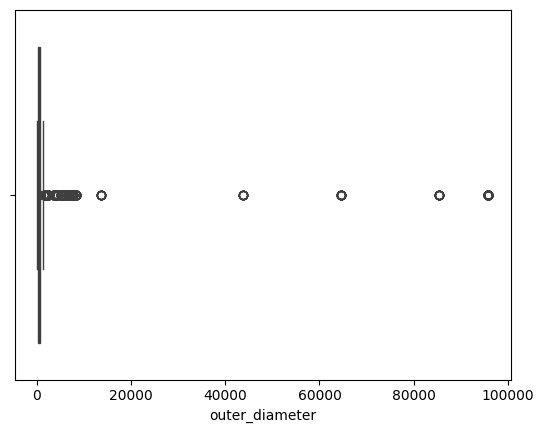

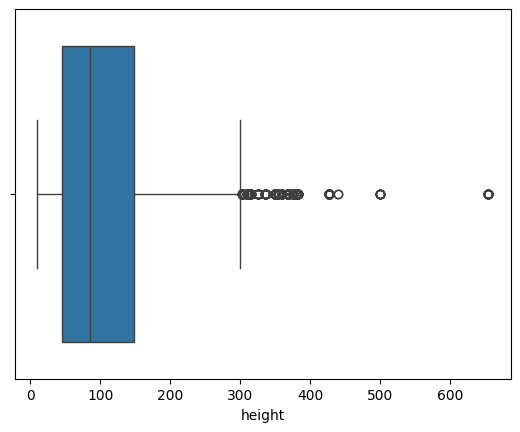

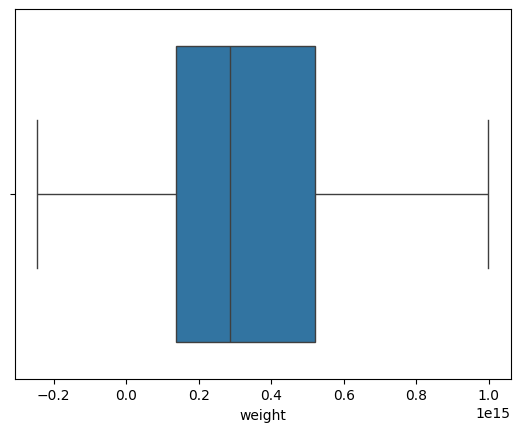

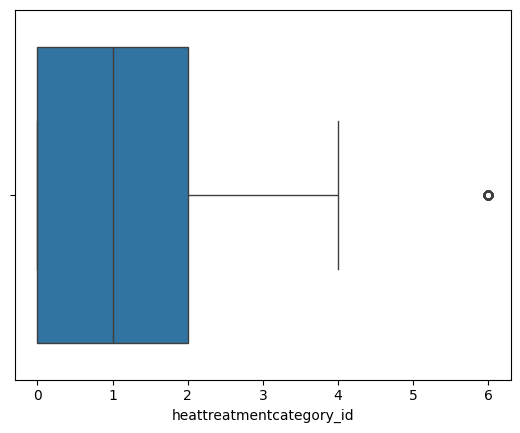

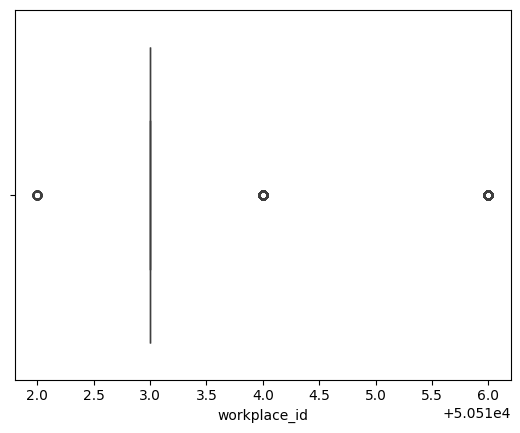

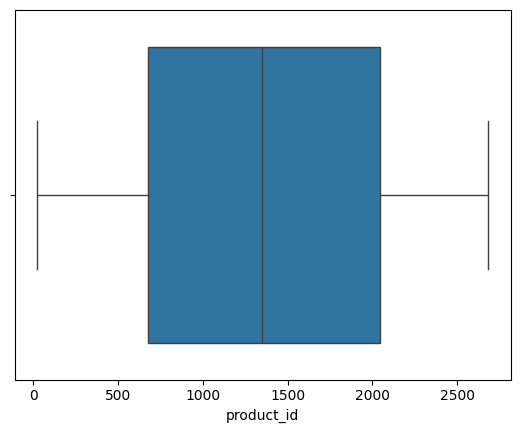

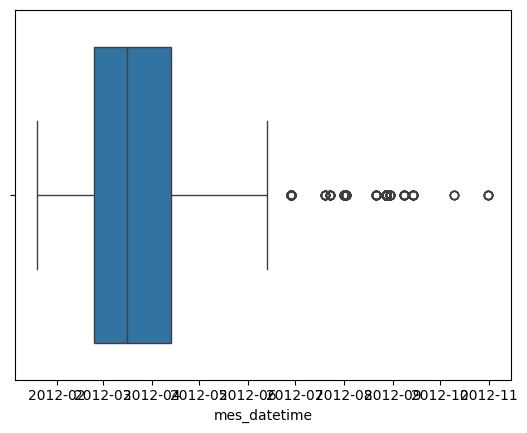

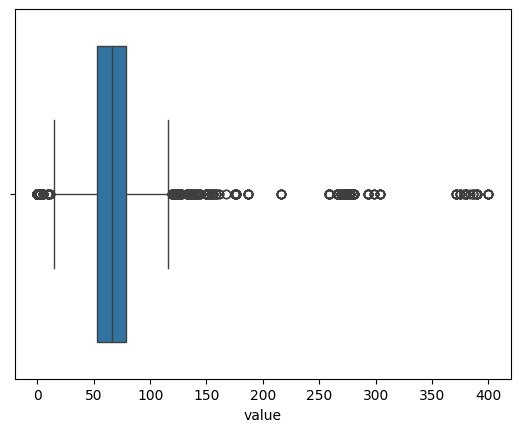

In [88]:
for col in stainless_steel_energy.columns:
    sns.boxplot(x=stainless_steel_energy[col])
    plt.show()

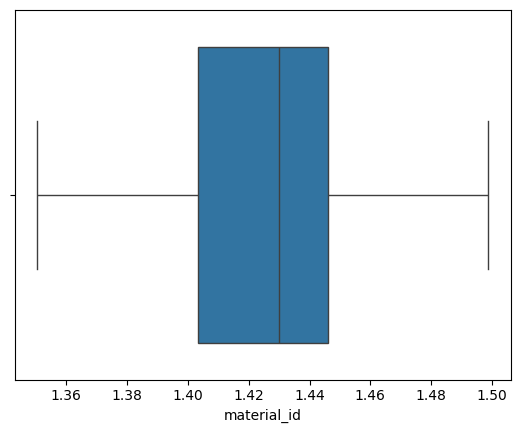

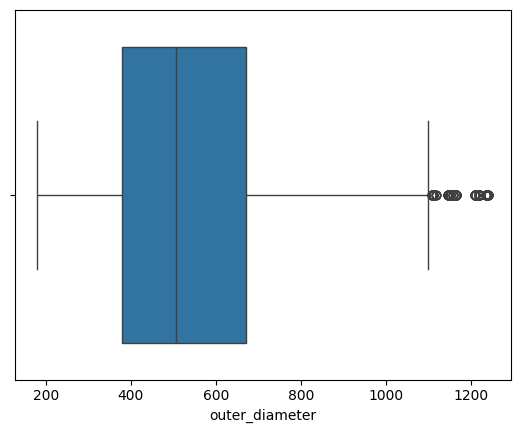

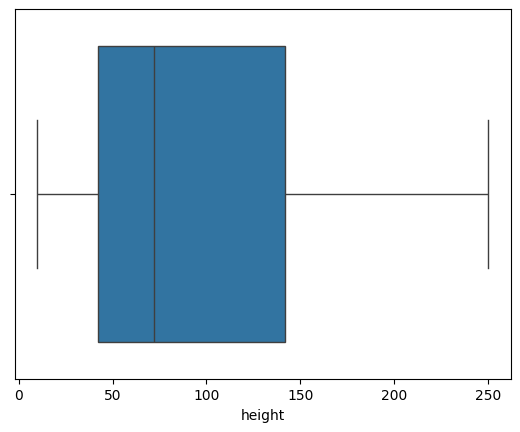

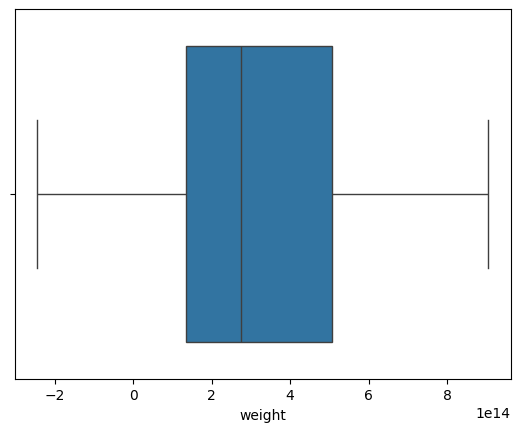

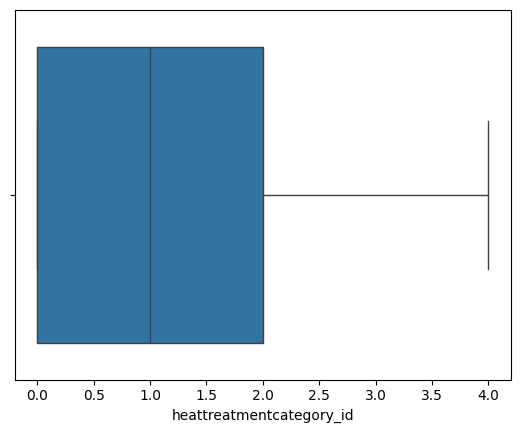

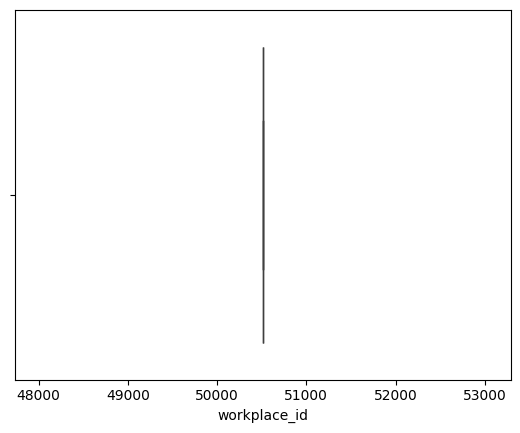

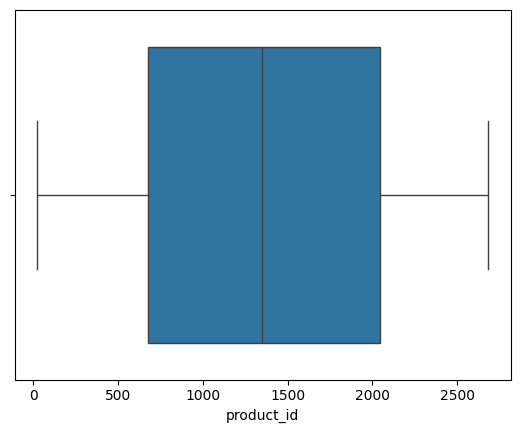

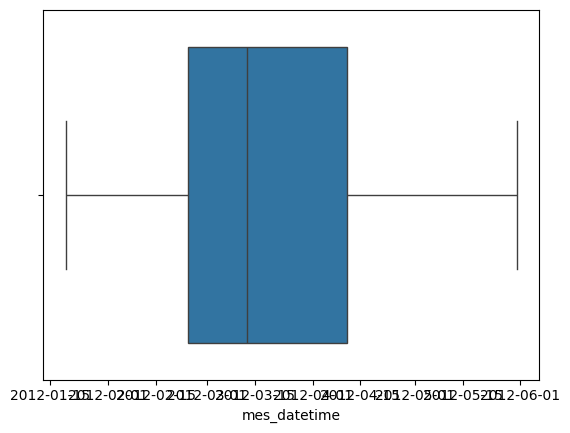

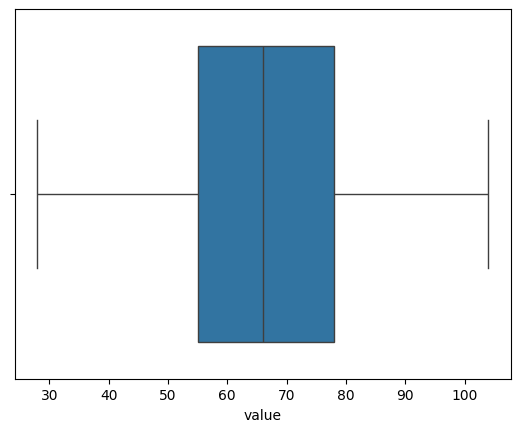

In [91]:
#removing outliers
# Remove rows with outliers basesed on IQR
for col in stainless_steel_energy.columns:
    if col != 'productcategory_id':
        Q1 = stainless_steel_energy[col].quantile(0.25)
        Q3 = stainless_steel_energy[col].quantile(0.75)
        # Calculate IQR
        IQR = Q3 - Q1
        # Define bounds
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR
        cleaned_stainless_steel_energy= stainless_steel_energy[(stainless_steel_energy[col] >= lower_bound) & (stainless_steel_energy[col] <= upper_bound)]
        #checking removed outliers
        sns.boxplot(x=cleaned_stainless_steel_energy[col])
        plt.show()

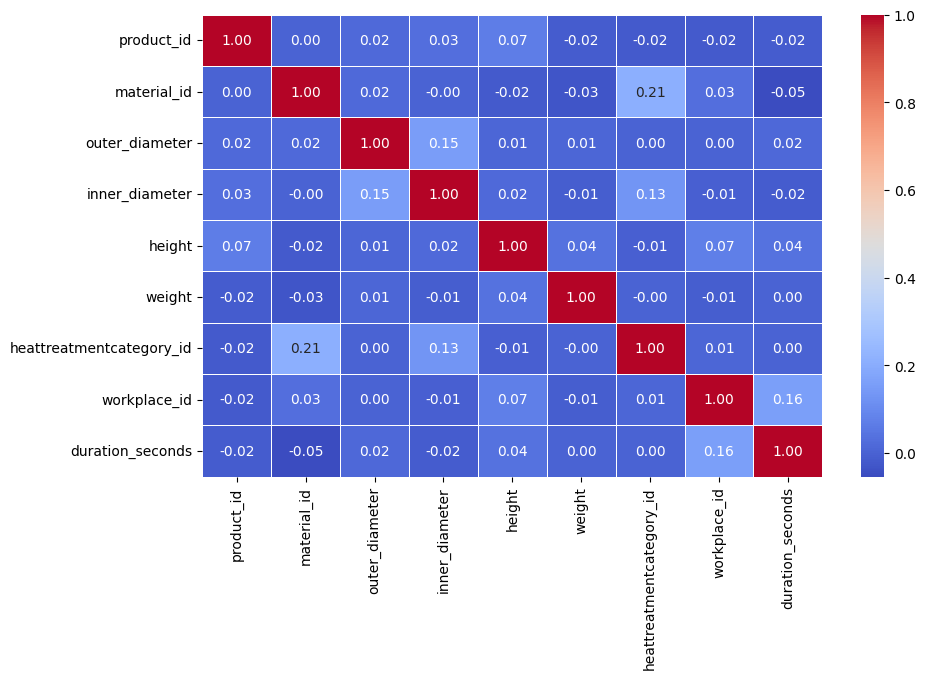

In [95]:
# Compute correlation matrix
numerical_columns_duration = cleaned_duration.select_dtypes(include=['number'])
corr_matrix = numerical_columns_duration.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

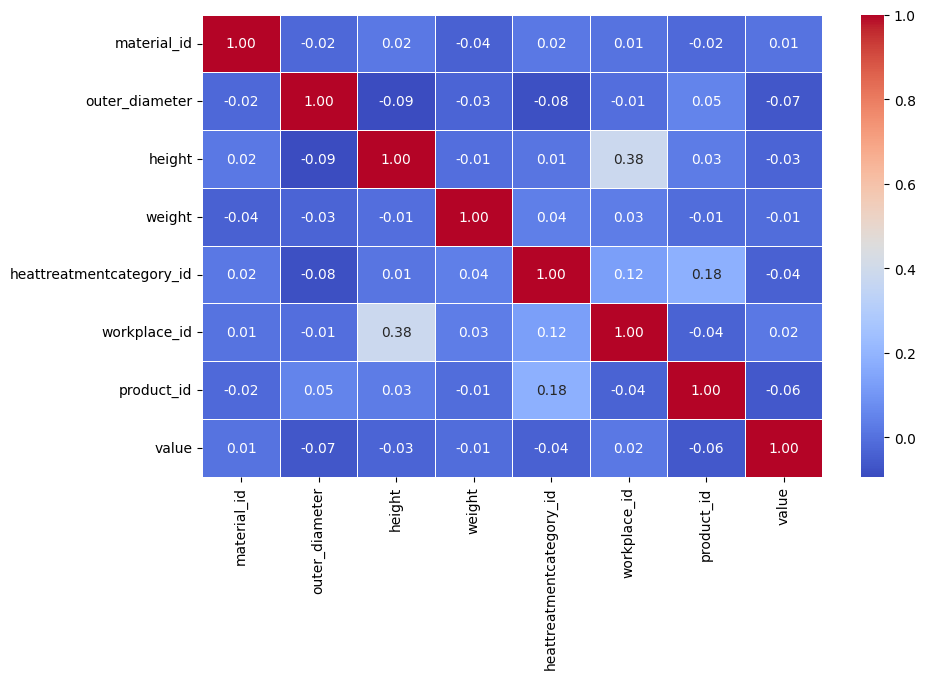

In [96]:
# Compute correlation matrix
numerical_columns_steel = cleaned_stainless_steel_energy.select_dtypes(include=['number'])
corr_matrix = numerical_columns_steel.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

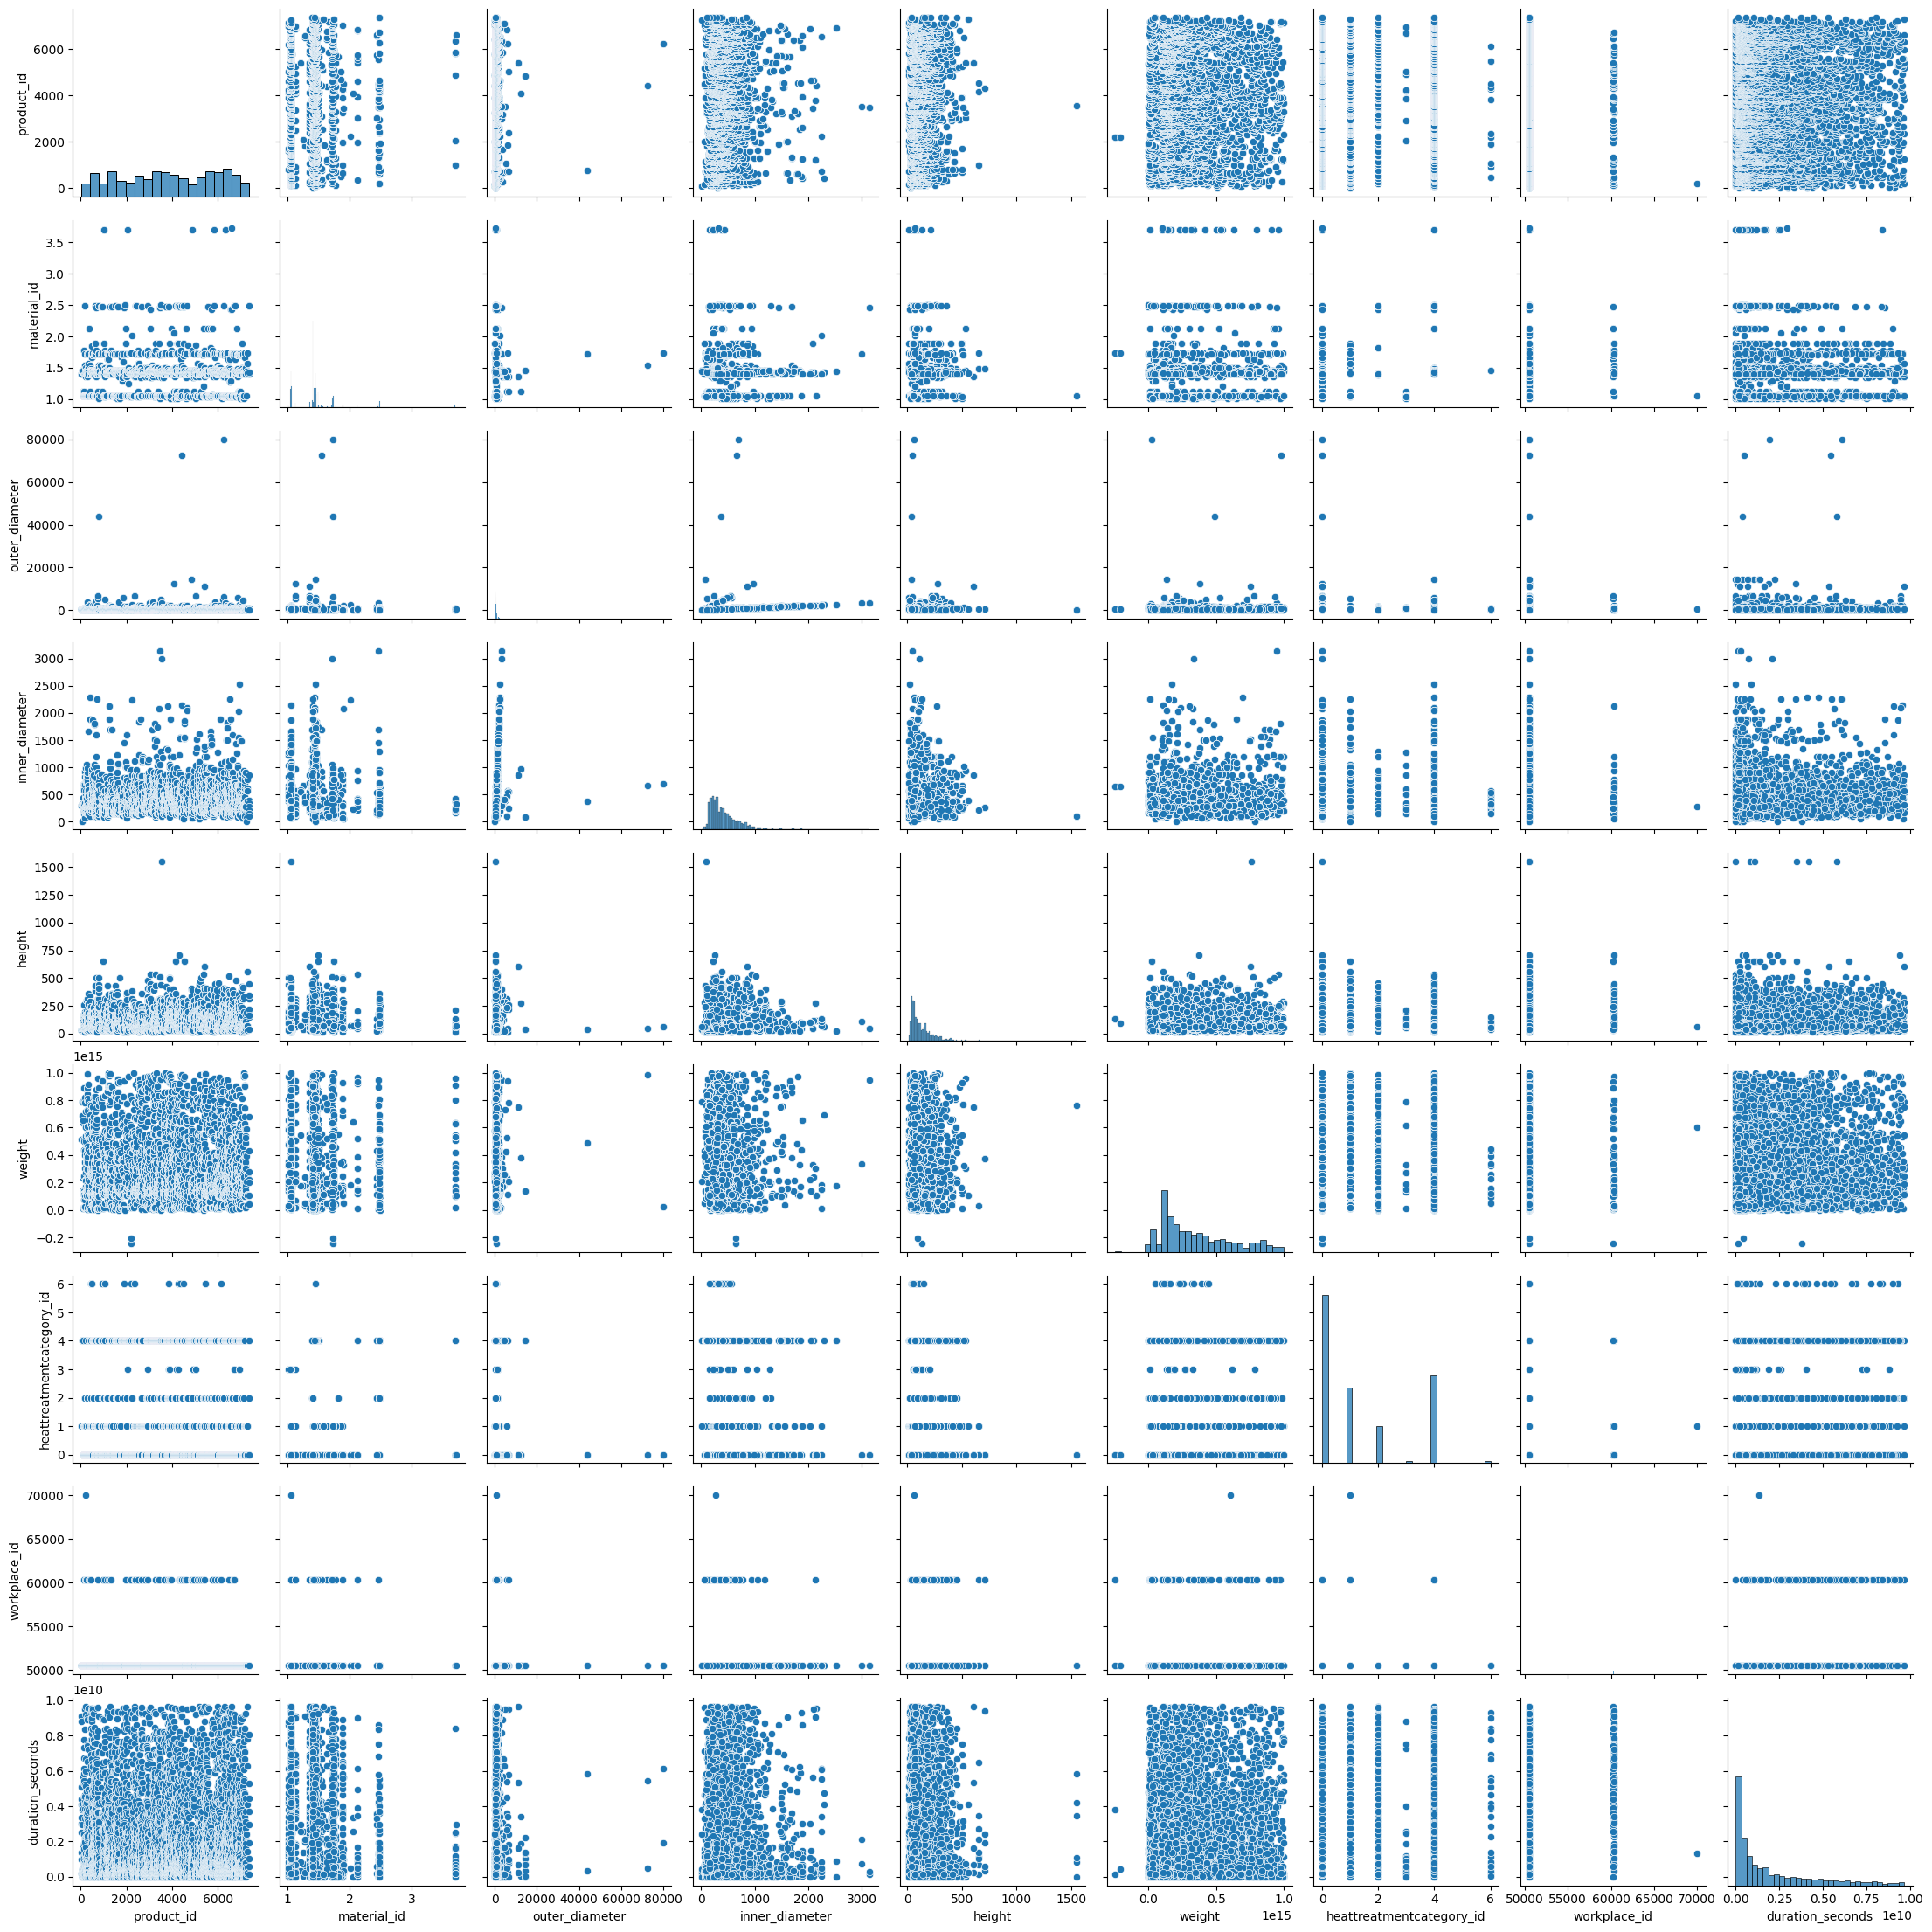

In [97]:
sns.pairplot(cleaned_duration)
plt.show()

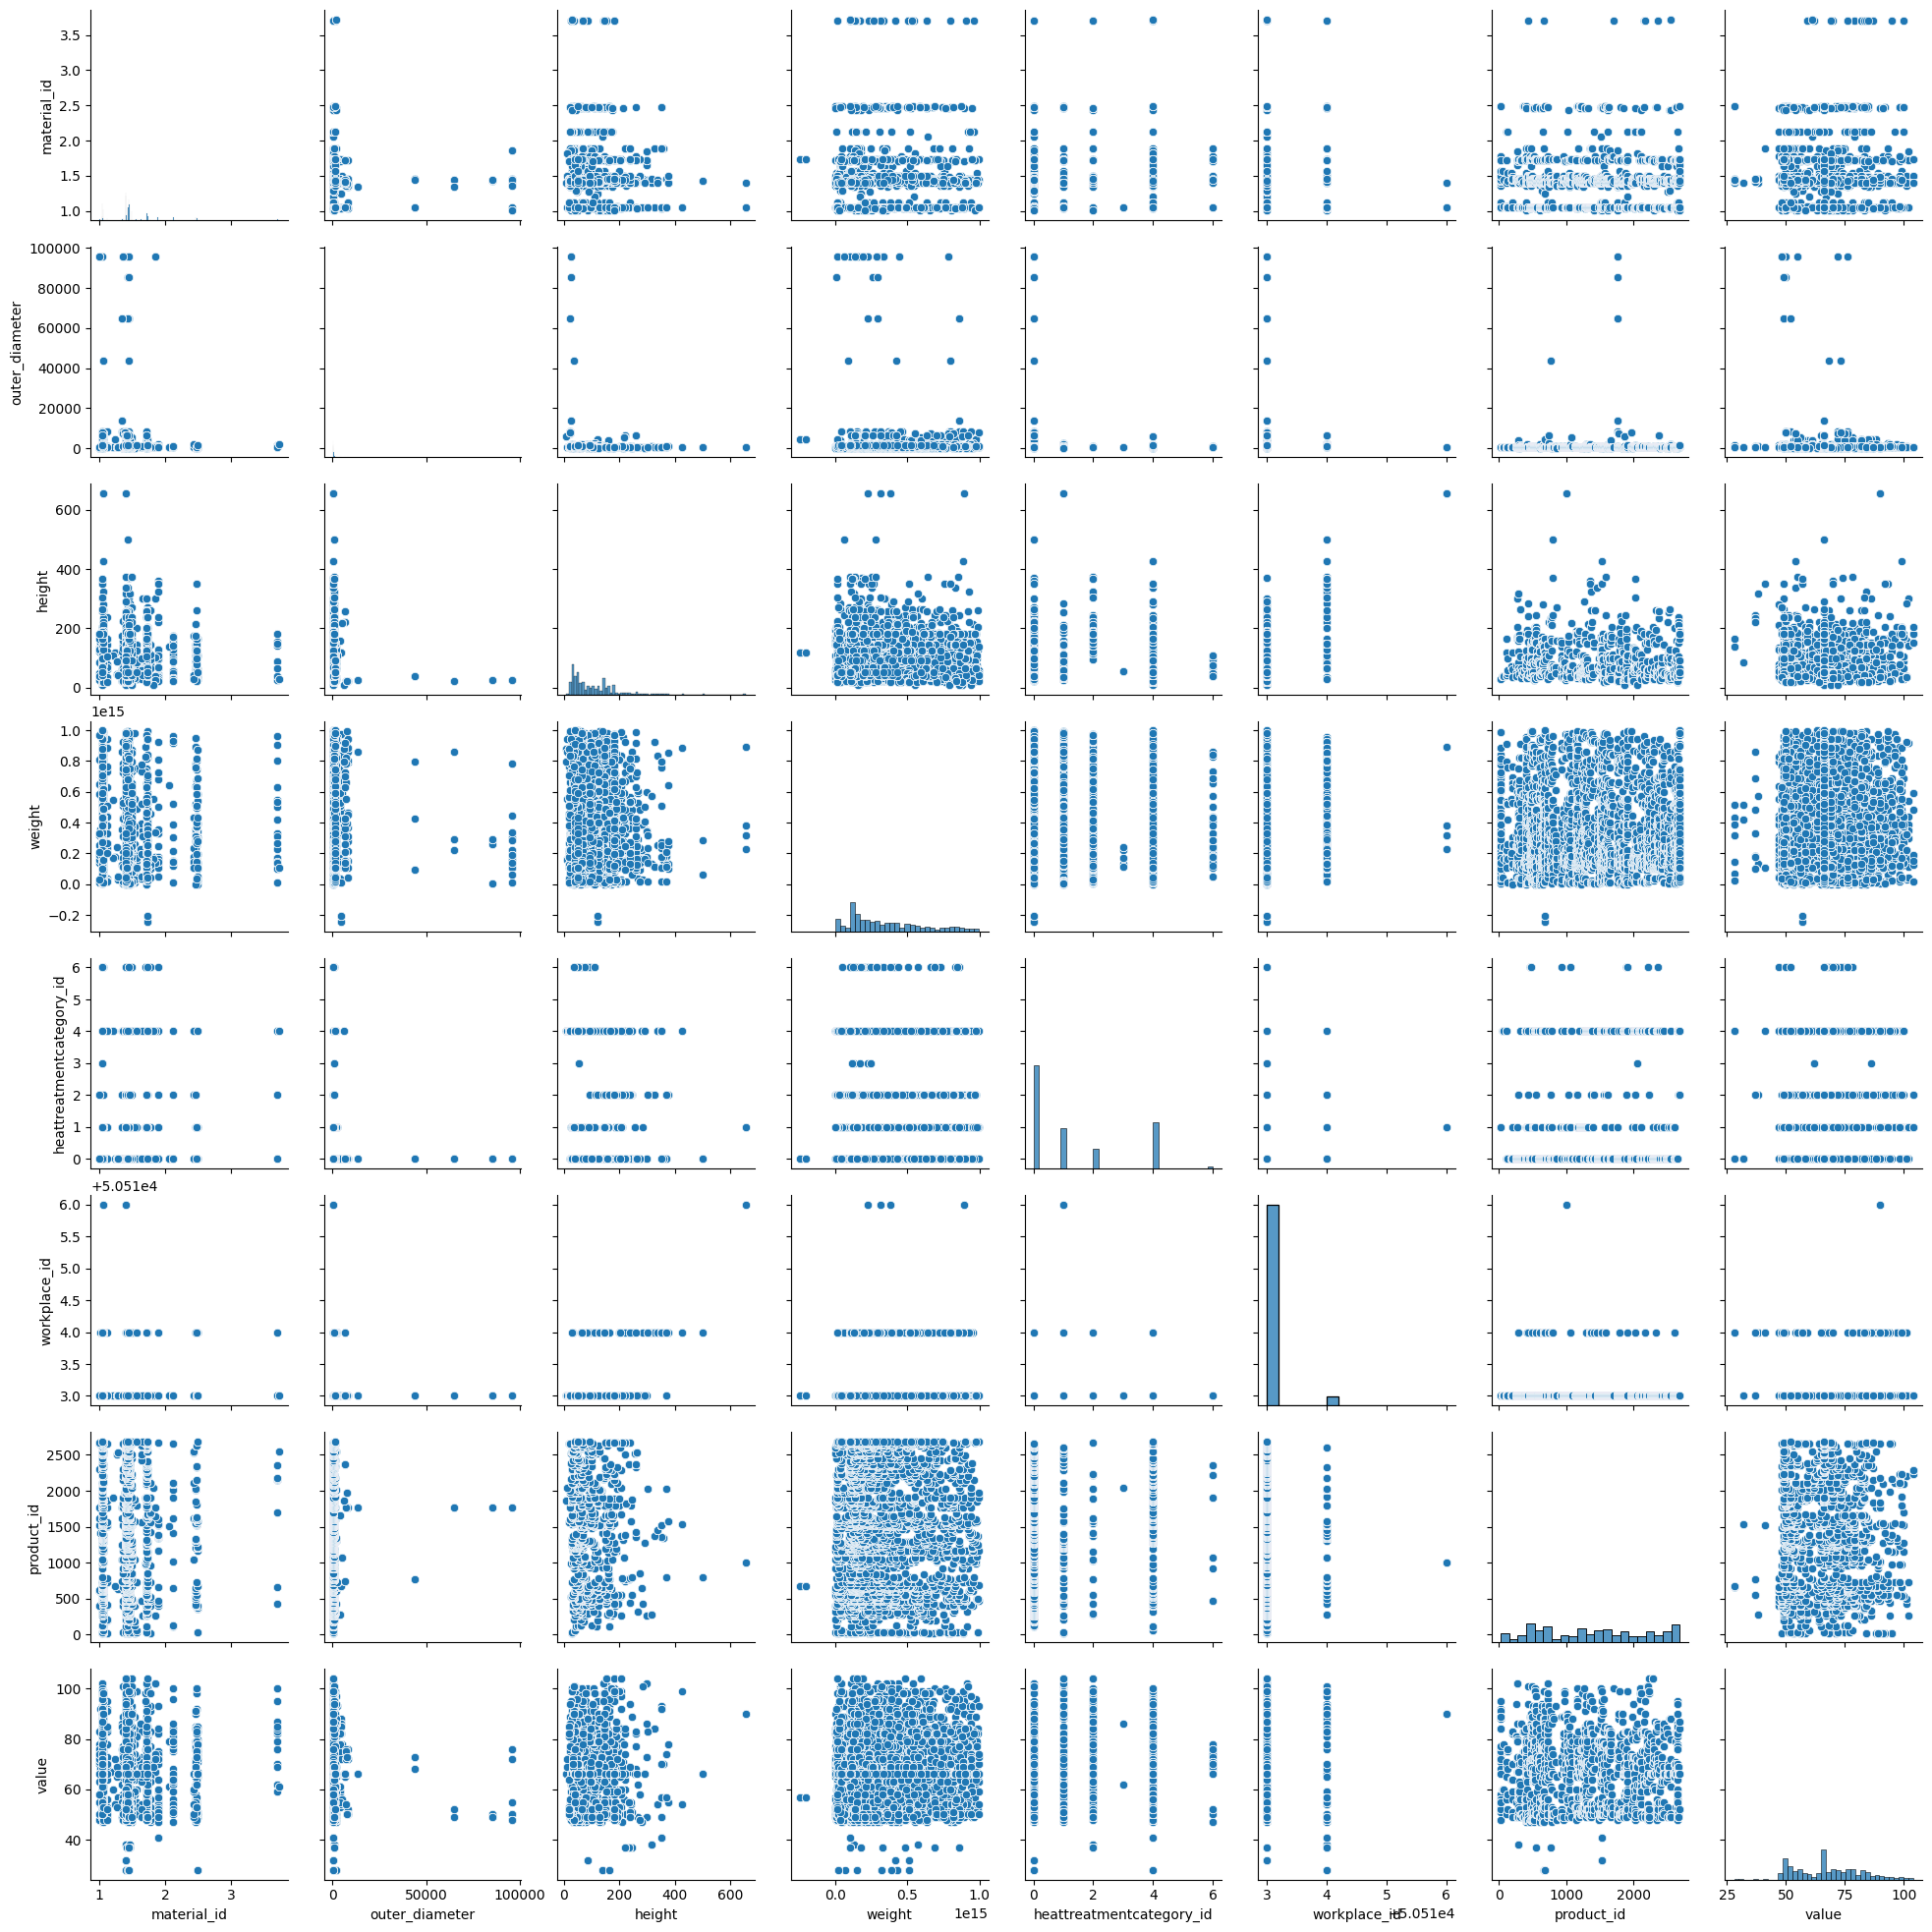

In [98]:
sns.pairplot(cleaned_stainless_steel_energy)
plt.show()


In [103]:
#saving cleaned data
numerical_columns_steel.to_excel('cleaned_steel_energy.xlsx', index=False)
numerical_columns_duration.to_excel('cleaned_duration.xlsx', index=False)